<Figure size 640x480 with 0 Axes>

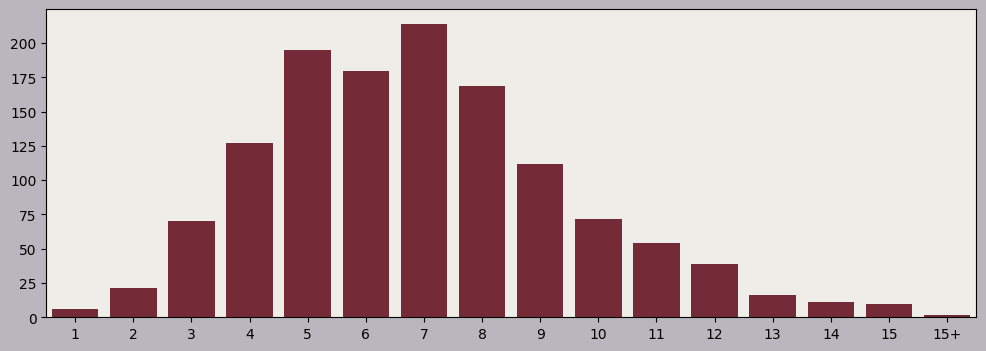

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import pandas as pd
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
np.random.seed(42)

# creating a distribution of chef counts based on their experience
hist, bins, _ = plt.hist(np.random.lognormal(mean=0, sigma=0.2, size=1300), bins=21) # I took 21 'years', to avoid heavy tail
plt.clf()

chefs_counts = {} # to get values of experience
for i in range(16):
    chefs_counts[i + 1] = hist[i] # hist separated via columns
copy_chefs_counts = chefs_counts.copy() # copy for vizualisation where instead of 16 will be 15+
copy_chefs_counts['15+'] = copy_chefs_counts.pop(16)

fig, ax = plt.subplots(figsize=(12, 4), facecolor = '#B9B7BD')
sns.barplot(x = list(copy_chefs_counts.keys()), y = list(copy_chefs_counts.values()),color = '#821D30')
ax.set_facecolor("#EEEDE7")

In [289]:
keys, values = list(chefs_counts.keys()),list(chefs_counts.values())
df = pd.DataFrame({'year': keys, 'amount': values})

# I have year and amount of cooks who has this year of experement, and i extend dataframe
df = df.loc[df.index.repeat(df['amount'])] # let's say year == 3 and I have 78 cooks, I multiply year string 78 times
df = df.reset_index(drop=True)
df.drop('amount', axis = 1, inplace = True) # no need anymore

# the range of average values for 1 - 8 years of experience, low and top points
first_8_down, first_8_up = np.linspace(0.95, 1.26, 8), np.linspace(1.02, 1.26, 8)

# and after 8 years, it might goes down and up
second_down, second_up = np.linspace(1.22, 1.05, 8), np.linspace(1.26,1.43,8)

for index, row in df.iterrows(): 
    if row['year'] in range(1,9): # I plan the average go up gradually 
        i = row['year'] - 1 
        df.loc[index, 'average'] = np.random.uniform(first_8_down[i] * np.random.uniform(0.95, 1.05), first_8_up[i] * \
            np.random.uniform(1.07, 1.11))
    else: # the same points as < 8 but it might goes up or down as well
        i = row['year'] -9
        df.loc[index, 'average'] = np.random.uniform(second_down[i] * 0.95, second_up[i]* 1.11)

<Axes: xlabel='year', ylabel='average'>

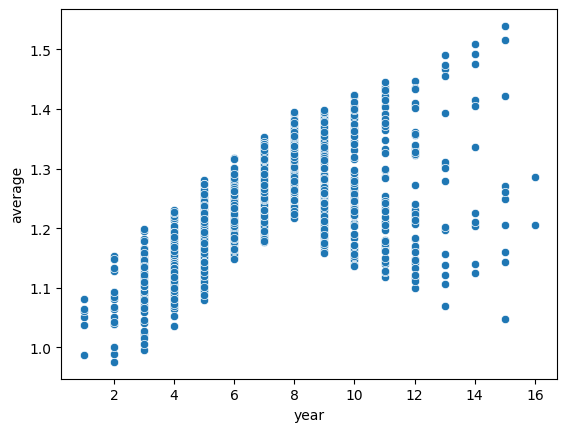

In [290]:
sns.scatterplot(df, x = 'year', y = 'average')